In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
df=data

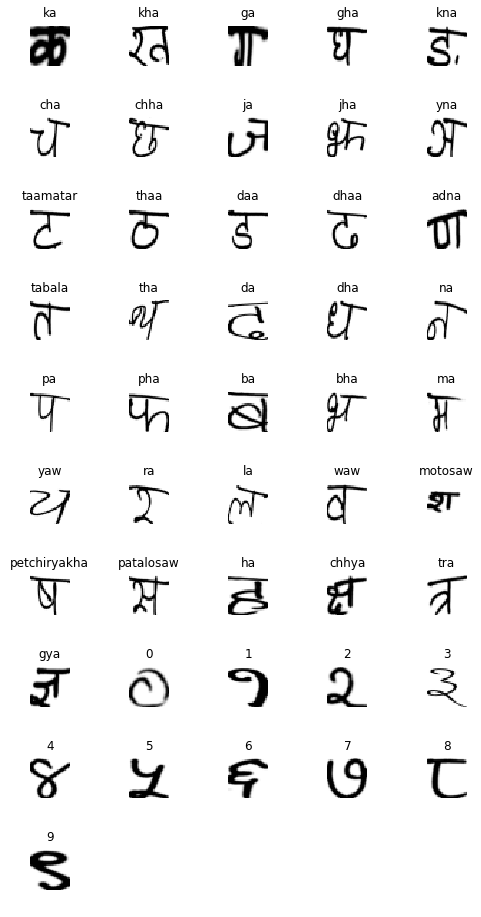

In [3]:
char_names = df.character.unique()  
rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = df[df.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])

            
plt.subplots_adjust(wspace=1, hspace=1)        

In [4]:
df['character'].value_counts()

digit_8                      2000
character_35_tra             2000
character_19_dha             2000
character_20_na              2000
character_04_gha             2000
character_21_pa              2000
digit_6                      2000
digit_5                      2000
digit_2                      2000
digit_0                      2000
character_24_bha             2000
character_06_cha             2000
character_08_ja              2000
character_22_pha             2000
character_15_adna            2000
character_09_jha             2000
character_26_yaw             2000
character_05_kna             2000
character_11_taamatar        2000
character_28_la              2000
character_02_kha             2000
character_07_chha            2000
character_31_petchiryakha    2000
digit_7                      2000
character_25_ma              2000
digit_4                      2000
character_23_ba              2000
character_18_da              2000
character_32_patalosaw       2000
character_13_d

In [5]:
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [9]:
data = df.sample(n=20000)

In [10]:
data['character'].value_counts()

character_25_ma              482
digit_9                      471
character_05_kna             470
character_33_ha              466
character_20_na              462
character_23_ba              459
character_36_gya             458
character_12_thaa            456
character_22_pha             456
character_11_taamatar        454
character_03_ga              453
digit_4                      449
character_28_la              448
character_02_kha             444
character_27_ra              444
character_06_cha             442
character_26_yaw             442
digit_3                      441
digit_0                      439
character_24_bha             439
character_04_gha             439
digit_8                      438
character_29_waw             436
digit_6                      436
digit_1                      434
character_35_tra             429
character_32_patalosaw       429
character_07_chha            428
character_09_jha             426
character_16_tabala          426
character_

In [ ]:
#df.drop(df.index[[]])

In [11]:
print(char_names.size,char_names)

46 ['character_01_ka' 'character_02_kha' 'character_03_ga' 'character_04_gha'
 'character_05_kna' 'character_06_cha' 'character_07_chha'
 'character_08_ja' 'character_09_jha' 'character_10_yna'
 'character_11_taamatar' 'character_12_thaa' 'character_13_daa'
 'character_14_dhaa' 'character_15_adna' 'character_16_tabala'
 'character_17_tha' 'character_18_da' 'character_19_dha' 'character_20_na'
 'character_21_pa' 'character_22_pha' 'character_23_ba' 'character_24_bha'
 'character_25_ma' 'character_26_yaw' 'character_27_ra' 'character_28_la'
 'character_29_waw' 'character_30_motosaw' 'character_31_petchiryakha'
 'character_32_patalosaw' 'character_33_ha' 'character_34_chhya'
 'character_35_tra' 'character_36_gya' 'digit_0' 'digit_1' 'digit_2'
 'digit_3' 'digit_4' 'digit_5' 'digit_6' 'digit_7' 'digit_8' 'digit_9']


In [12]:
X = data.values[:,:-1]/255.0
Y = data["character"].values
print(X,Y)

[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]] ['character_03_ga' 'character_04_gha' 'character_06_cha' ...
 'character_35_tra' 'character_07_chha' 'character_11_taamatar']


In [15]:
n_classes = 46

In [17]:
import random
# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [19]:
# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [20]:
img_height_rows = 32
img_width_cols = 32

In [21]:
im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)

In [22]:
cnn = Sequential()

In [23]:
kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [25]:
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [26]:
# Let's deactivate around 20% of neurons randomly for training
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

In [28]:
# Now add the Dense layers
h_dense_0 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=64, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_1)

In [29]:
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

In [30]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [31]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
__________

In [32]:
history = cnn.fit(x_train, y_train,
                  batch_size=32, epochs=10,
                  validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 14000 samples, validate on 6000 samples
Epoch 1/10
14000/14000 [==============================] - 134s 10ms/step - loss: 1.7235 - acc: 0.5155 - val_loss: 0.7558 - val_acc: 0.7647
Epoch 2/10
14000/14000 [==============================] - 122s 9ms/step - loss: 0.5606 - acc: 0.8275 - val_loss: 0.4488 - val_acc: 0.8707
Epoch 3/10
14000/14000 [==============================] - 119s 9ms/step - loss: 0.3349 - acc: 0.8935 - val_loss: 0.3450 - val_acc: 0.8908
Epoch 4/10
14000/14000 [==============================] - 120s 9ms/step - loss: 0.2375 - acc: 0.9245 - val_loss: 0.2504 - val_acc: 0.9235
Epoch 5/10
14000/14000 [==============================] - 119s 9ms/step - loss: 0.1713 - acc: 0.9431 - val_loss: 0.2723 - val_acc: 0.9182
Epoch 6/10
14000/14000 [==============================] - 122s 9ms/step - loss: 0.1436 - acc: 0.9519 - val_loss: 0.2699 - val_acc: 0.9218
Epoch 7/10
14000/14000 [==============================] - 128s 9ms/step - 

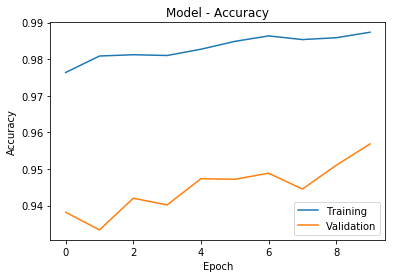

In [34]:
# Accuracy
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

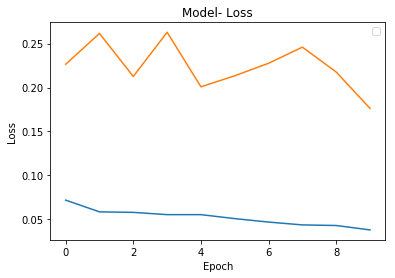

In [35]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [39]:
cnn.predict(x_test)

array([[1.7866750e-11, 2.8339093e-09, 2.1654425e-07, ..., 3.7182570e-11,
        9.6802975e-09, 1.3760602e-12],
       [1.4247487e-16, 3.8628933e-13, 5.4207568e-14, ..., 5.6873093e-11,
        1.8060962e-14, 2.7440782e-07],
       [8.4537356e-11, 2.7680410e-15, 3.2372831e-20, ..., 1.6446850e-06,
        7.5420468e-11, 4.3084065e-12],
       ...,
       [9.9999344e-01, 2.7319355e-10, 4.8366771e-12, ..., 4.0161621e-11,
        8.0831094e-14, 1.0664309e-10],
       [1.0537033e-08, 5.8036754e-08, 4.6813854e-16, ..., 2.6256235e-12,
        7.4099109e-09, 1.2630820e-06],
       [6.5065689e-11, 1.1561582e-09, 1.9089374e-12, ..., 3.0646980e-08,
        7.5741313e-14, 5.5906024e-10]], dtype=float32)

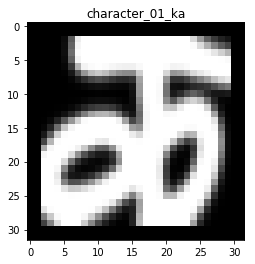

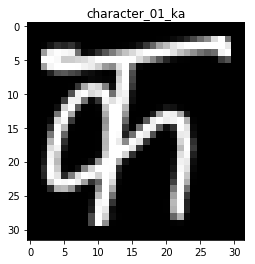

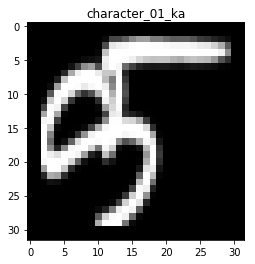

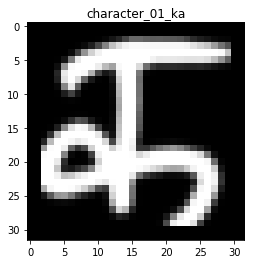

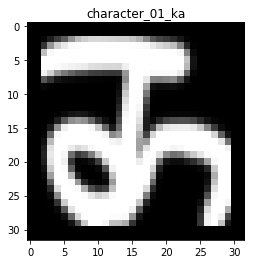

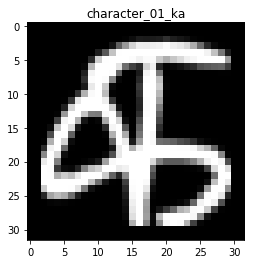

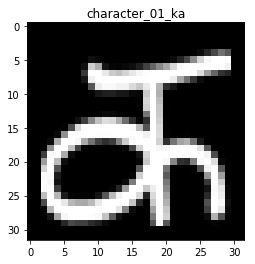

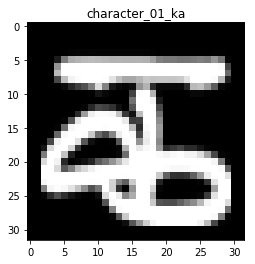

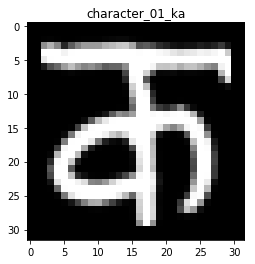

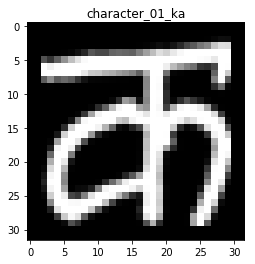

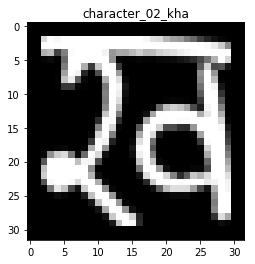

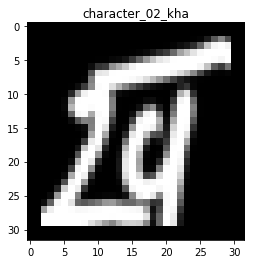

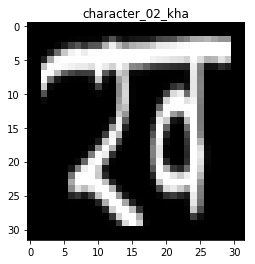

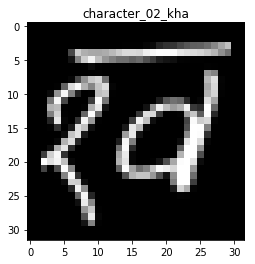

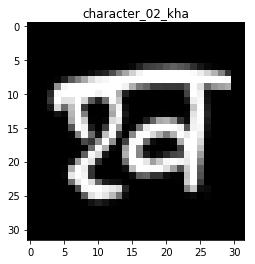

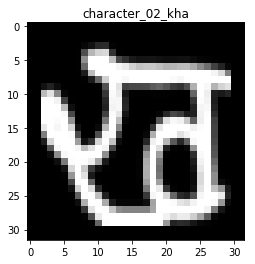

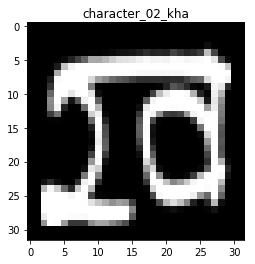

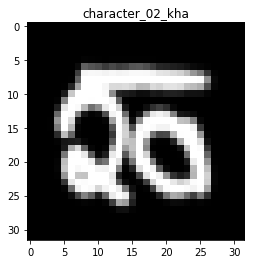

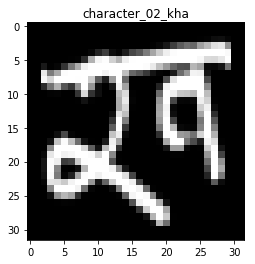

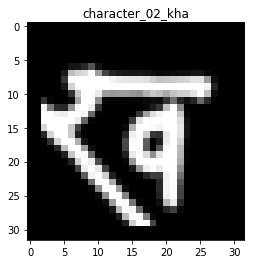

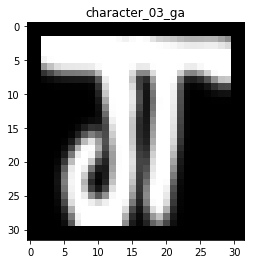

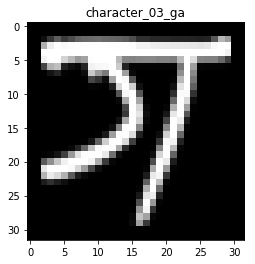

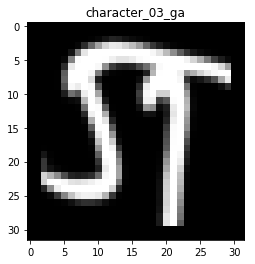

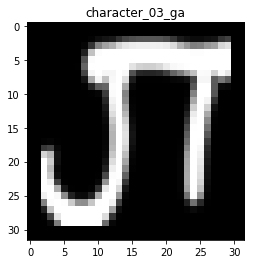

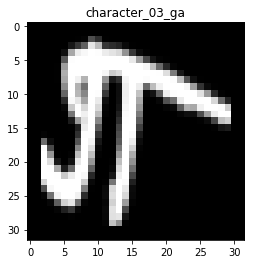

In [17]:
# for i in range(1,5000,200):
#     img = X_train.iloc[i].values
#     img = img.reshape((32,32))
#     plt.imshow(img,cmap='gray')
#     plt.title(df.iloc[i,1024])
#     plt.show()